In [11]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline # for showing the figures in the Notebook itself


UsageError: unrecognized arguments: # for showing the figures in the Notebook itself


In [12]:
from wordcloud import WordCloud

In [13]:
# importing the worldcloud module. Wordcloud uses the text sizes to represent the frequency of the text

In [14]:
df=pd.read_csv("C:/Users/METRO/Desktop/dsml/Jan 26_notes/use_cases_EDA/FIFA/FIFA_data.csv")

In [15]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [16]:
df.shape

(18207, 89)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [18]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

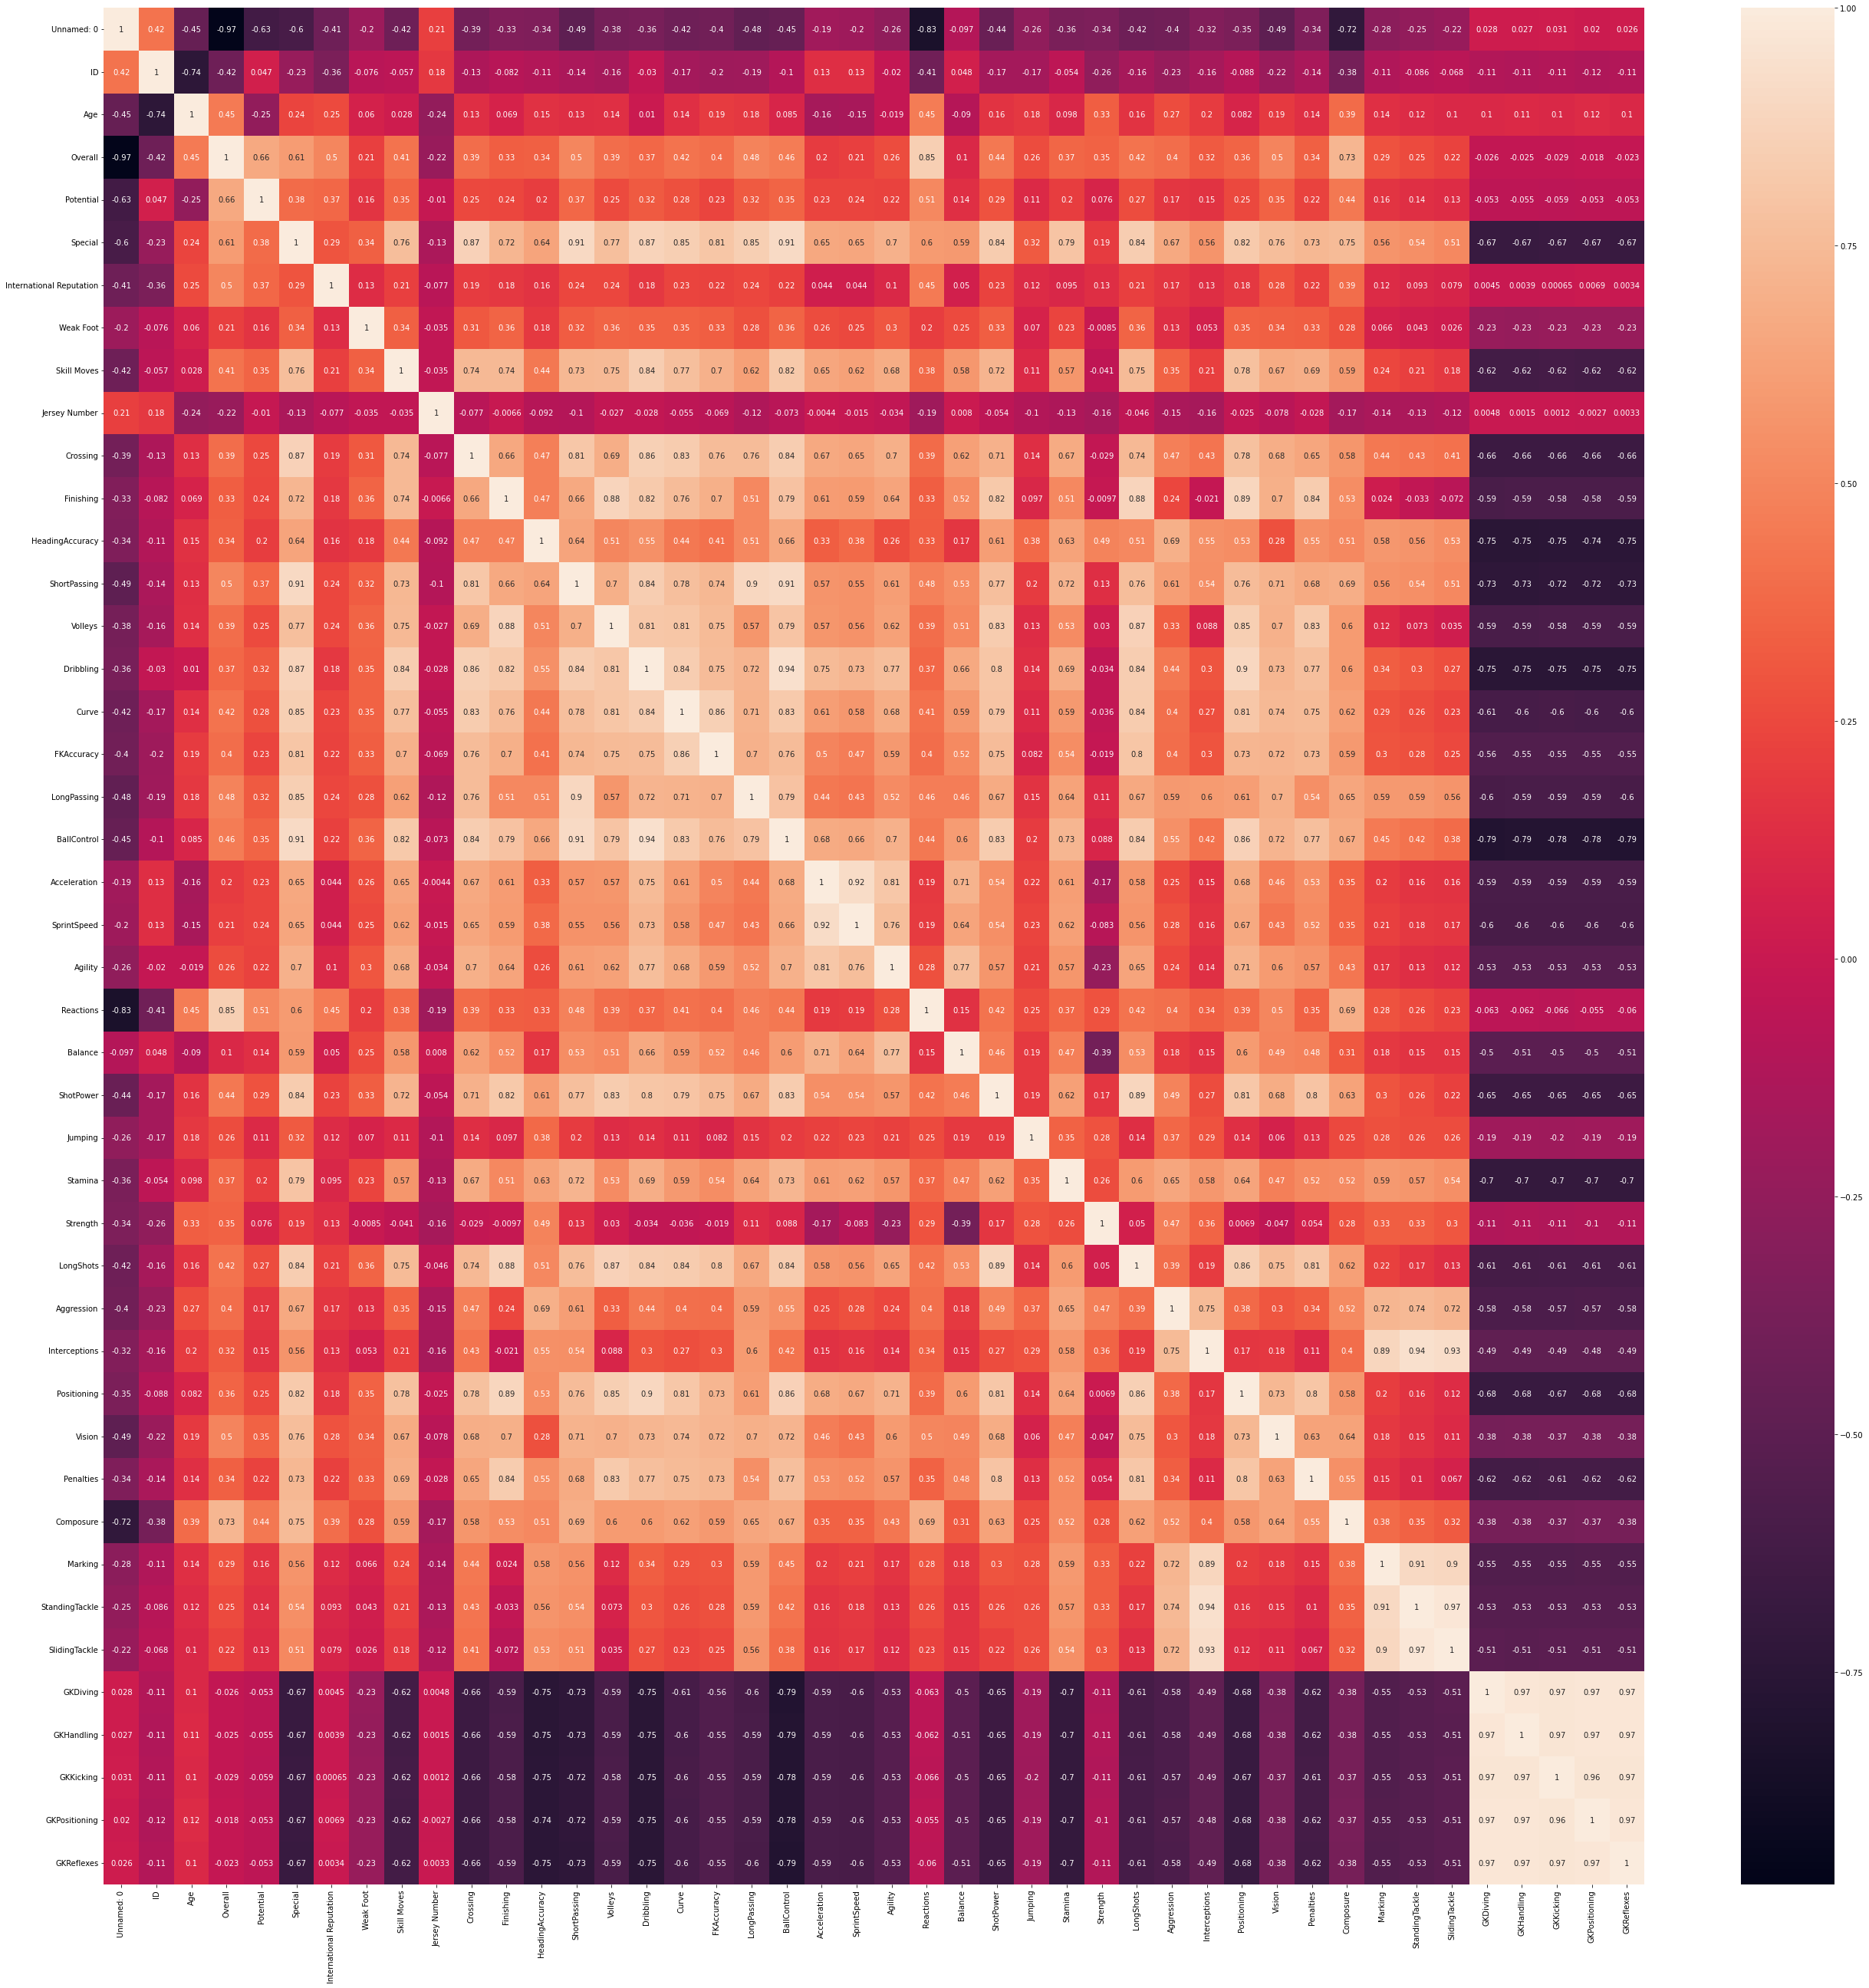

In [20]:
fig,ax=plt.subplots(figsize=(45,45))
sns.heatmap(df.corr(),annot=True)
plt.show()

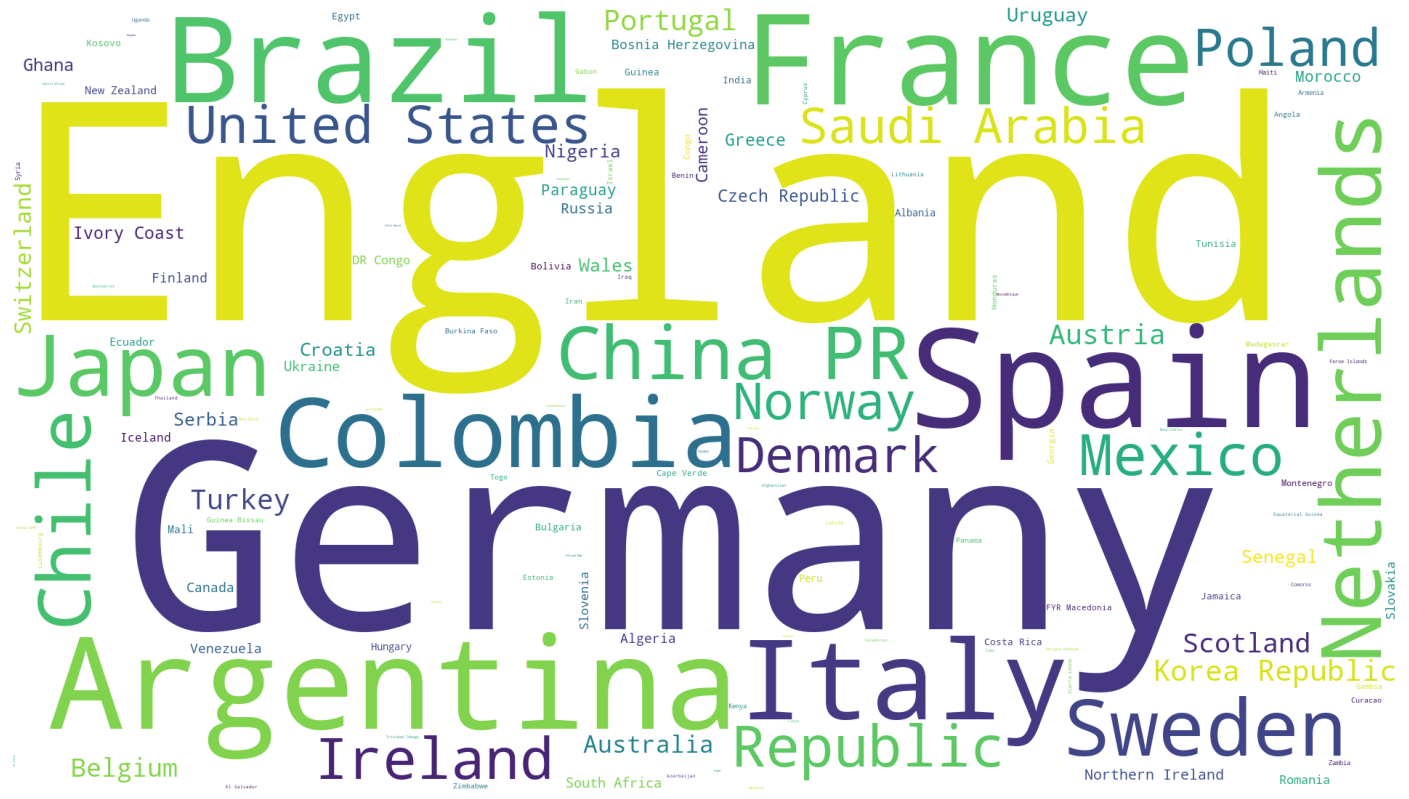

In [21]:
plt.subplots(figsize=(25,25))
wordcloud=WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [25]:
df['Club'].isna().sum()
df['Position'].isna().sum()

60

In [26]:
df['Club'].fillna('No Club',inplace=True)

In [27]:
df['Position'].fillna('ST',inplace=True)

In [35]:
to_impute_by_mean=df.loc[:,['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [36]:
for i in to_impute_by_mean.columns:
    df[i].fillna(df[i].mean(),inplace=True)

In [37]:
to_impute_by_mode=df.loc[:,['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]

In [38]:
for i in to_impute_by_mode.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [39]:
to_impute_by_median=df.loc[:,['Weak Foot', 'Skill Moves']]

In [40]:
for i in to_impute_by_median.columns:
    df[i].fillna(df[i].median(),inplace=True)
    

In [41]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [42]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [43]:
df.fillna(0,inplace=True)

In [44]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [50]:
df['Mental']

KeyError: 'Mental'

In [59]:
def defending(data):
    return int(round((data[['Marking','StandingTackle']].mean()).mean()))

In [53]:
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

In [54]:
def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [55]:
df.rename(columns={'Club Logo':'Club_Logo'},inplace=True)

In [56]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [60]:
df['Defending'] = df.apply(defending, axis = 1)

In [62]:
df['General'] = df.apply(general, axis = 1)

In [63]:
df['Mental'] = df.apply(mental, axis = 1)

In [64]:
 df['Passing'] = df.apply(passing, axis = 1)

In [65]:
df['Mobility'] = df.apply(mobility, axis = 1)

In [66]:
df['Power'] = df.apply(power, axis = 1)

In [67]:
df['Rating'] = df.apply(rating, axis = 1)

In [68]:
df['Shooting'] = df.apply(shooting, axis = 1)

In [69]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... GKReflexes Release Clause Defending  General  \
0         FC Barcelona  ...        8.0        €226.5M        30       89   
1             Juventus  ...       11.0        €127.1M        30       88   
2  Paris Saint-Germain  ...       11.0        €228.1M        26       85   
3    Manchester United  ...       94.0        €138.6M        18       26   
4      Manchester City  ...       13.0        €196.4M        63       79   

  Mental  Passing  Mobility  Power Rating Shooting  
0     71       87        91     74     94       88  
1     73       81        91     83     94       88  
2     72       80        94     69     92       84  
3     43       39        66     54     92       21  
4     81       92        81     76     92       85  

[5 rows x 97 columns]

In [70]:
players=df[['Name','Defending','General','Mental','Passing',
            'Mobility','Power','Rating','Shooting','Flag','Age','Nationality','Photo','Club_Logo','Club']]

In [72]:
players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         30       89      71       87        91     74   
1  Cristiano Ronaldo         30       88      73       81        91     83   
2          Neymar Jr         26       85      72       80        94     69   
3             De Gea         18       26      43       39        66     54   
4       K. De Bruyne         63       79      81       92        81     76   

   Rating  Shooting                                 Flag  Age Nationality  \
0      94        88  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1      94        88  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2      92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3      92        21  https://cdn.sofifa.org/flags/45.png   27       Spain   
4      92        85   https://cdn.sofifa.org/flags/7.png   27     Belgium   

                                            Photo  \
0  https://cdn.sofifa.org/players/4/19/158023.png   
1   https://cdn.sofifa.org/players/4/19/20801.png   
2  https://cdn.sofifa.org/players/4/19/190871.png   
3  https://cdn.sofifa.org/players/4/19/193080.png   
4  https://cdn.sofifa.org/players/4/19/192985.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

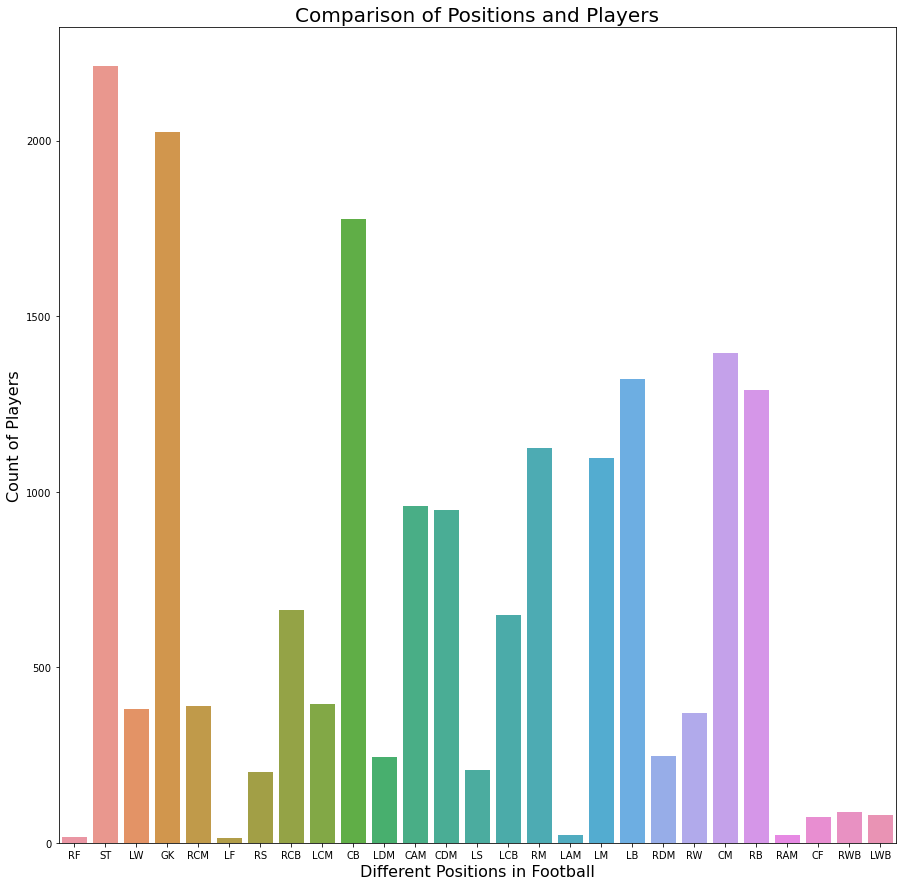

In [74]:
plt.figure(figsize=(15,15))
ax=sns.countplot('Position',data=df)
ax.set_xlabel(xlabel='Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

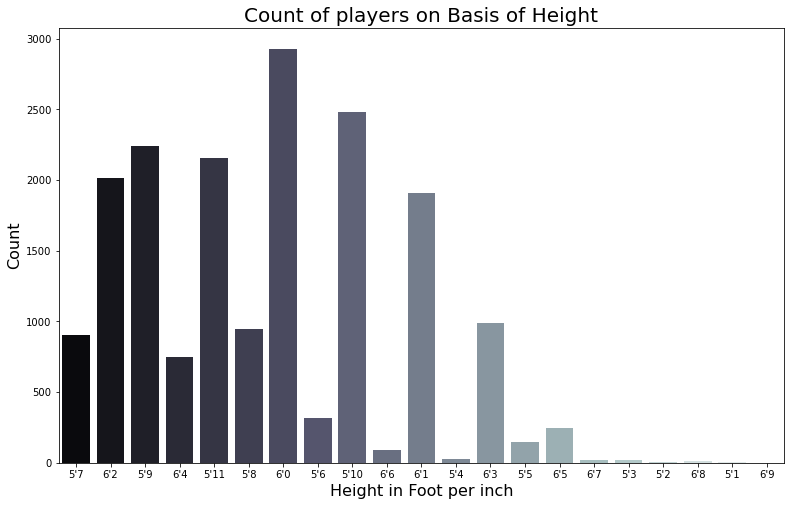

In [75]:
# plotting coun of players based on their heights
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'bone')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


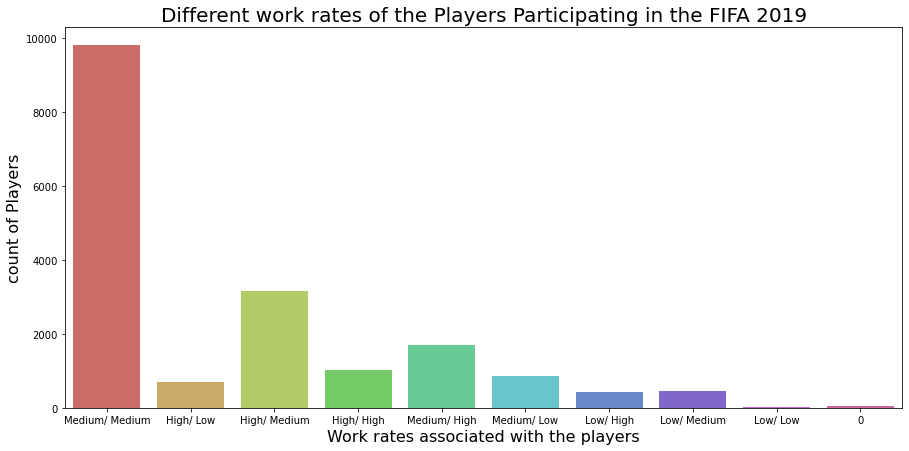

In [77]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 7))
sns.countplot(x = 'Work Rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

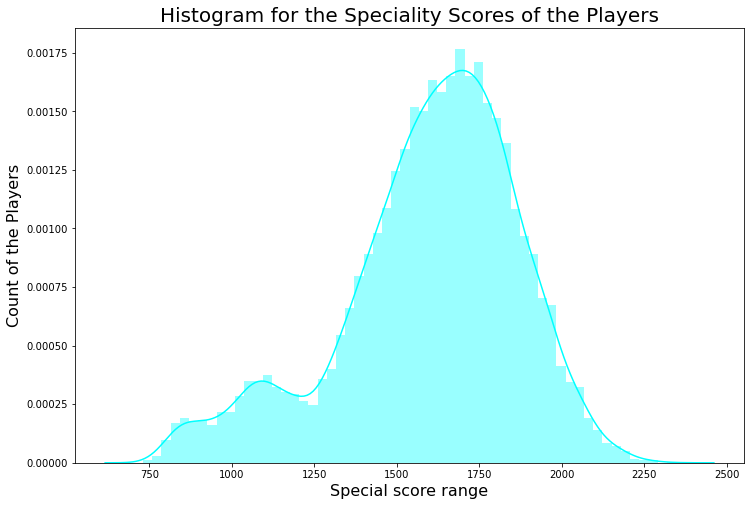

In [79]:
x = df.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = True, color = 'cyan')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

In [81]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
# defining a tuple consisting of country names
data_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']] # extracting the overall data of the countries selected in the line above
data_countries.head()

Unnamed: 0      ID          Name  Age  \
3            3  193080        De Gea   27   
8            8  155862  Sergio Ramos   32   
14          14  215914      N. Kanté   27   
15          15  211110     P. Dybala   24   
16          16  202126       H. Kane   24   

                                             Photo Nationality  \
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   

                                   Flag  Overall  Potential  \
3   https://cdn.sofifa.org/flags/45.png       91         93   
8   https://cdn.sofifa.org/flags/45.png       91         91   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   

                 Club  ... GKReflexes Release Clause Defending  General  \
3   Manchester United  ...       94.0        €138.6M        18       26   
8         Real Madrid  ...       11.0        €104.6M        90       78   
14            Chelsea  ...       10.0        €121.3M        90       66   
15           Juventus  ...        8.0        €153.5M        22       85   
16  Tottenham Hotspur  ...       11.0        €160.7M        46       82   

   Mental  Passing  Mobility  Power Rating Shooting  
3      43       39        66     54     92       21  
8      77       74        78     82     91       68  
14     83       78        84     85     90       61  
15     67       81        87     76     92       86  
16     75       79        76     80     90       85  

[5 rows x 97 columns]

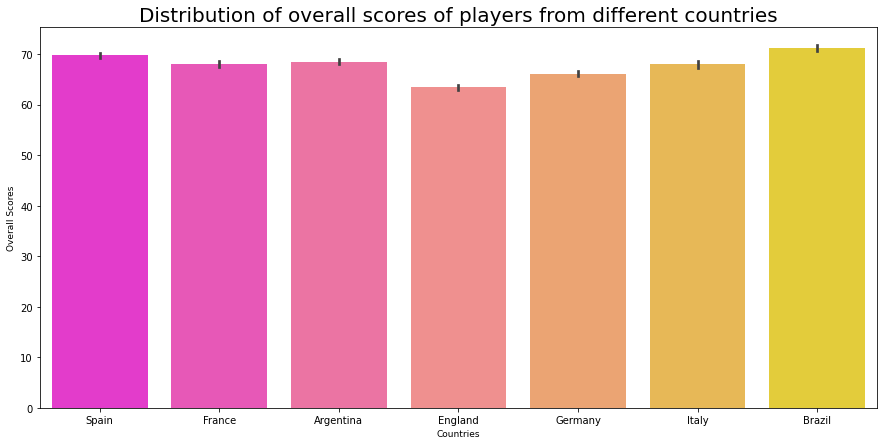

In [82]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring') # creating a bargraph
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

In [83]:
df['Club'].value_counts()

No Club                      241
FC Barcelona                  33
Burnley                       33
AS Monaco                     33
Everton                       33
                            ... 
América FC (Minas Gerais)     20
Fluminense                    20
Sligo Rovers                  19
Limerick FC                   19
Derry City                    18
Name: Club, Length: 652, dtype: int64

In [84]:
data=df.copy()

In [85]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid') # creating a tuple of club names

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

Unnamed: 0      ID          Name  Age  \
5            5  183277     E. Hazard   27   
6            6  177003     L. Modrić   32   
7            7  176580     L. Suárez   31   
8            8  155862  Sergio Ramos   32   
14          14  215914      N. Kanté   27   

                                             Photo Nationality  \
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   

                                   Flag  Overall  Potential          Club  \
5    https://cdn.sofifa.org/flags/7.png       91         91       Chelsea   
6   https://cdn.sofifa.org/flags/10.png       91         91   Real Madrid   
7   https://cdn.sofifa.org/flags/60.png       91         91  FC Barcelona   
8   https://cdn.sofifa.org/flags/45.png       91         91   Real Madrid   
14  https://cdn.sofifa.org/flags/18.png       89         90       Chelsea   

    ... GKReflexes Release Clause Defending  General Mental  Passing  \
5   ...        8.0        €172.1M        30       83     72       84   
6   ...        9.0        €137.4M        68       81     80       89   
7   ...       37.0          €164M        54       85     78       74   
8   ...       11.0        €104.6M        90       78     77       74   
14  ...       10.0        €121.3M        90       66     83       78   

    Mobility  Power Rating Shooting  
5         92     75     91       82  
6         84     77     91       78  
7         84     81     91       87  
8         78     82     91       68  
14        84     85     90       61  

[5 rows x 97 columns]

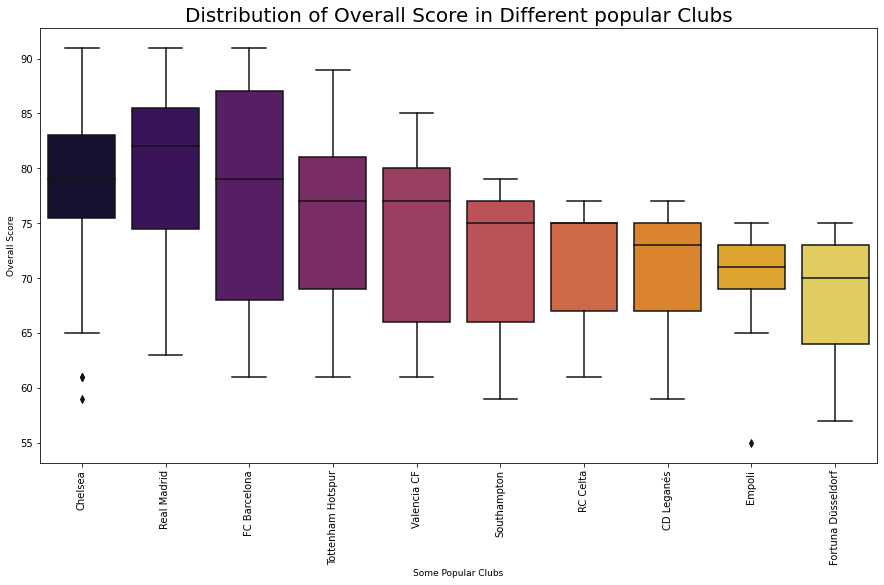

In [87]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [88]:
left=data[data['Preferred Foot']=='Left'][['Name','Age','Club','Nationality']].head(10)

In [89]:
left

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

In [90]:
# finding out the top 10 Right footed footballers

right = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)
right

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

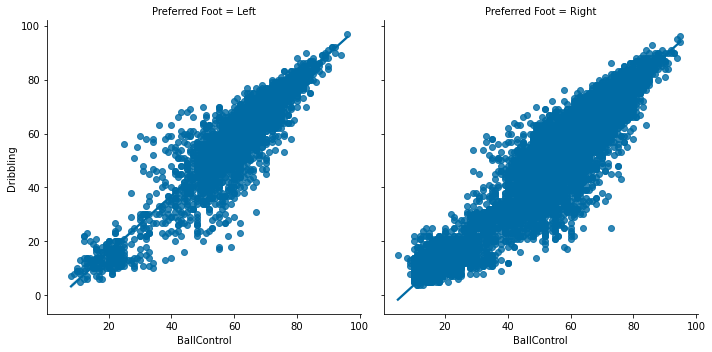

In [91]:
sns.lmplot(x='BallControl',y='Dribbling',data=data,col='Preferred Foot')
plt.show()

In [93]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending=True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [94]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending=False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [95]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... GKReflexes Release Clause Defending  General  \
0         FC Barcelona  ...        8.0        €226.5M        30       89   
1             Juventus  ...       11.0        €127.1M        30       88   
2  Paris Saint-Germain  ...       11.0        €228.1M        26       85   
3    Manchester United  ...       94.0        €138.6M        18       26   
4      Manchester City  ...       13.0        €196.4M        63       79   

  Mental  Passing  Mobility  Power Rating Shooting  
0     71       87        91     74     94       88  
1     73       81        91     83     94       88  
2     72       80        94     69     92       84  
3     43       39        66     54     92       21  
4     81       92        81     76     92       85  

[5 rows x 97 columns]

In [97]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [98]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club_Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
0        8.0        €226.5M         30      89      71       87        91   
1       11.0        €127.1M         30      88      73       81        91   
2       11.0        €228.1M         26      85      72       80        94   
3       94.0        €138.6M         18      26      43       39        66   
4       13.0        €196.4M         63      79      81       92        81   

  Power Rating Shooting  
0    74     94       88  
1    83     94       88  
2    69     92       84  
3    54     92       21  
4    76     92       85  

[5 rows x 96 columns]

In [101]:
#Player with maximum Potential and Overall Performance
player=str(df.loc[df['Potential'].idxmax()][1])

In [102]:
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [103]:
# finding the best players for each performance criteria

pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [109]:
# creating a list of best players in each of the pr_cols criteria
i=0
best = []
while i < len(pr_cols):
    best.append(df.loc[df[pr_cols[i]].idxmax()][1])
    i +=1

In [110]:
best

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

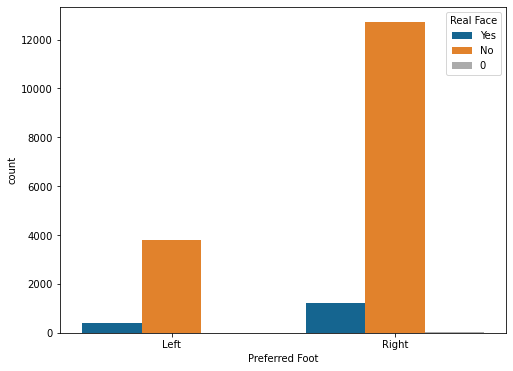

In [113]:
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Preferred Foot',hue='Real Face',data=df)
plt.show()

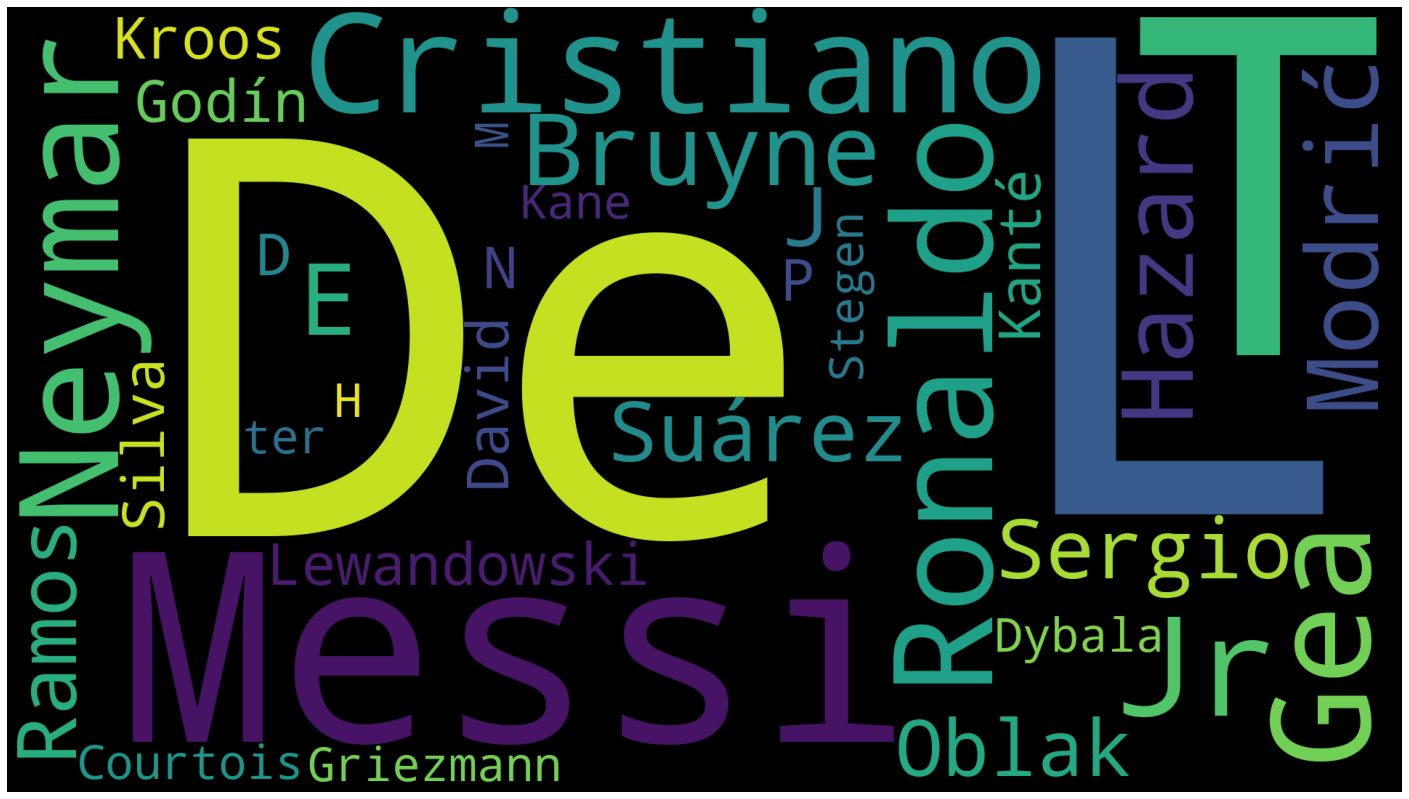

In [119]:
plt.subplots(figsize=(25,25))
wordcloud=WordCloud(
                    background_color='black',width=1920,height=1080).generate(" ".join(df.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

In [120]:
df.columns 

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

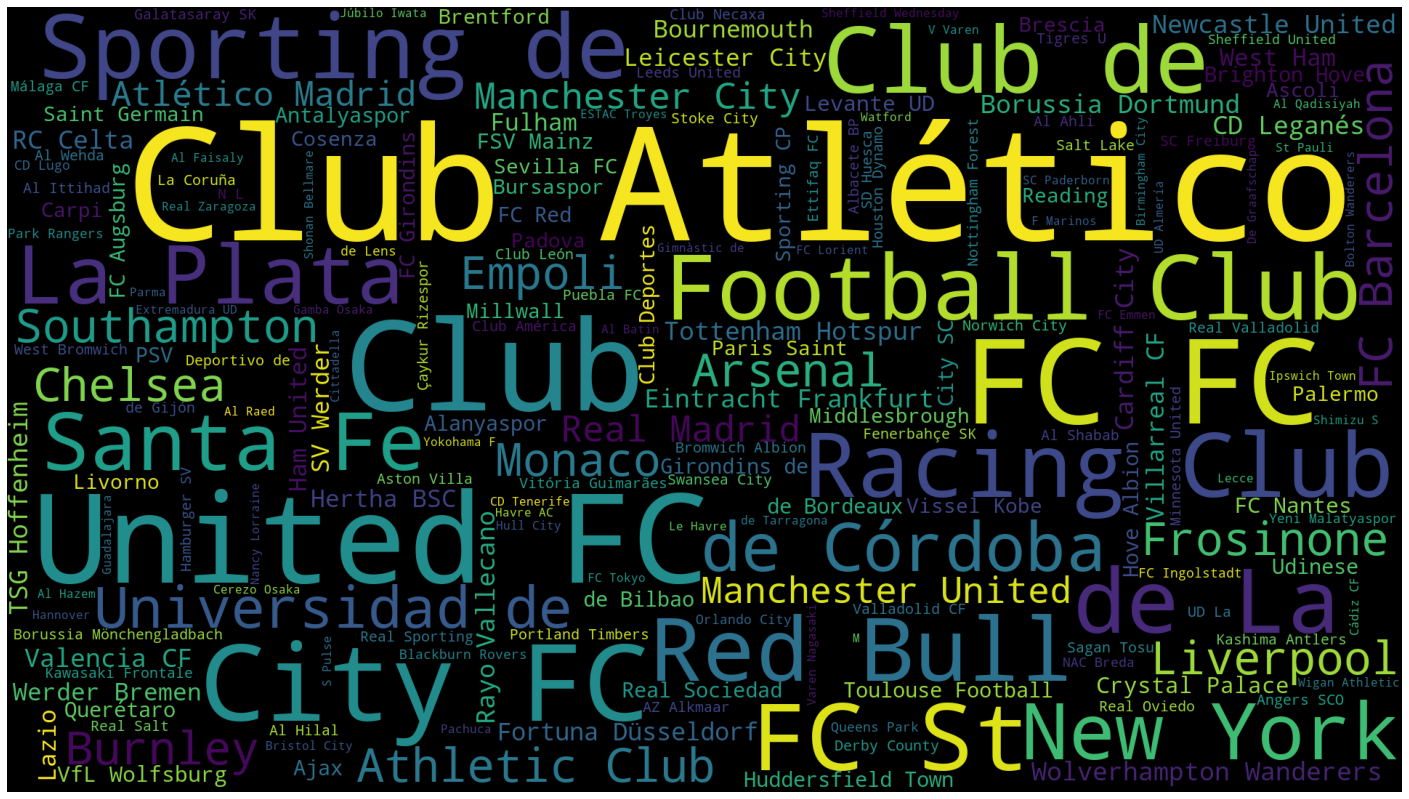

In [121]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

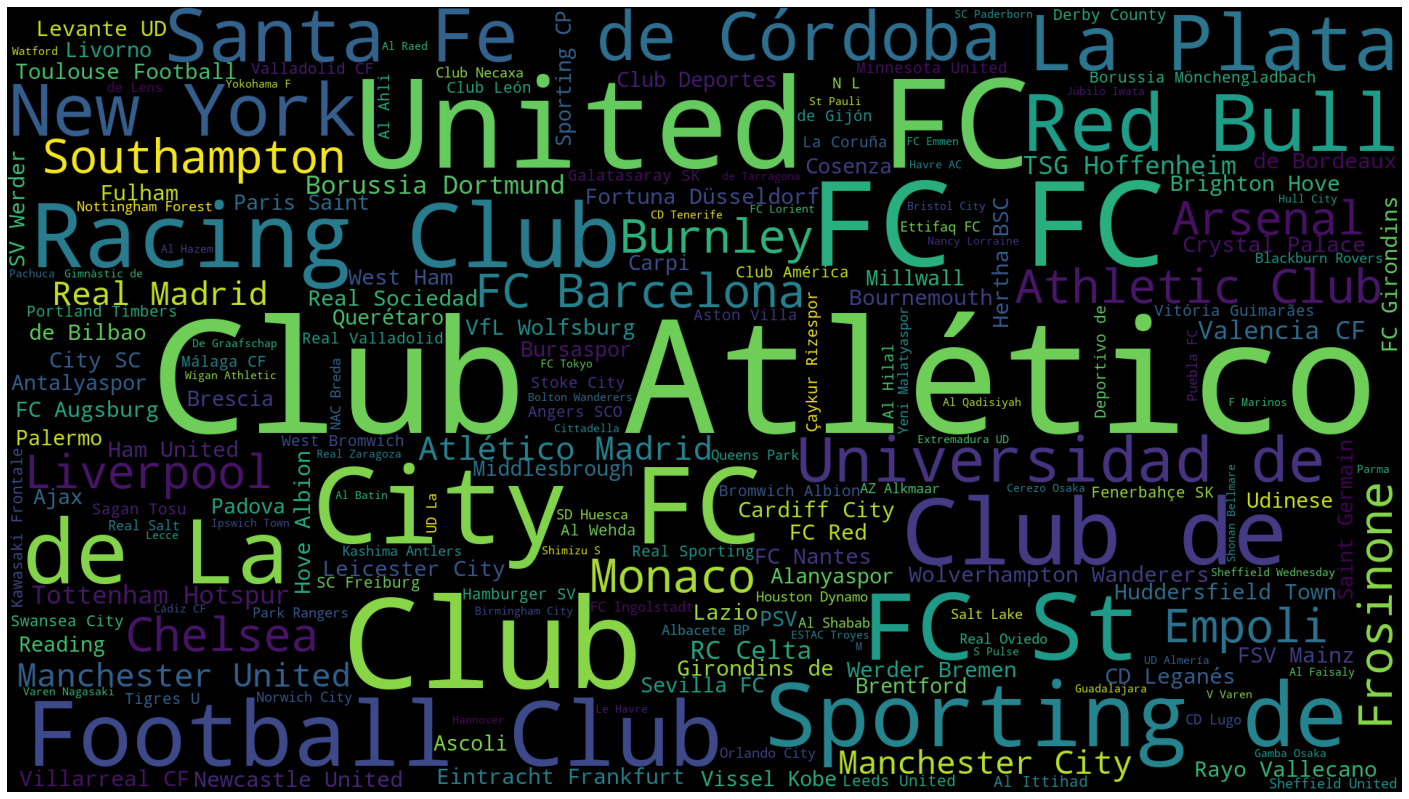

In [122]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

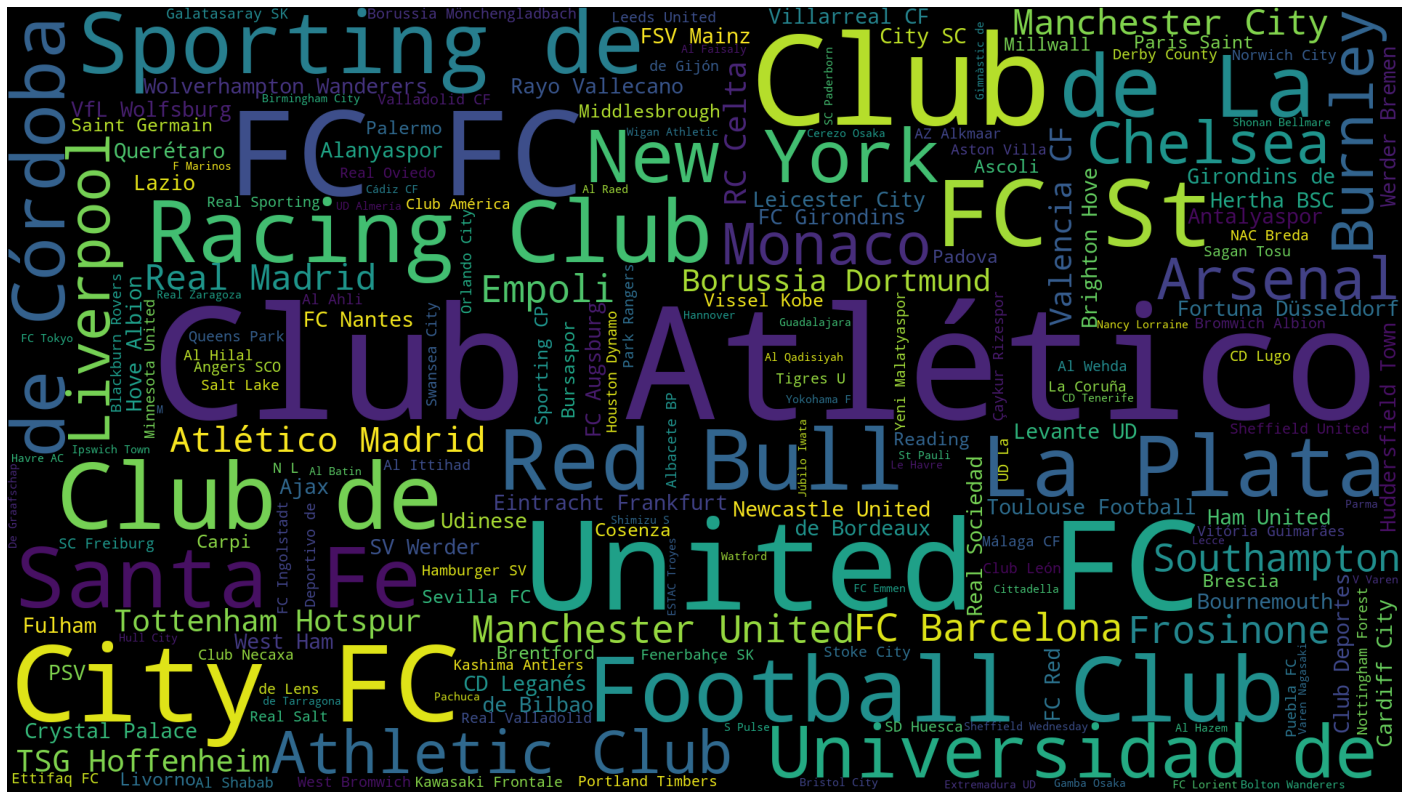

In [123]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

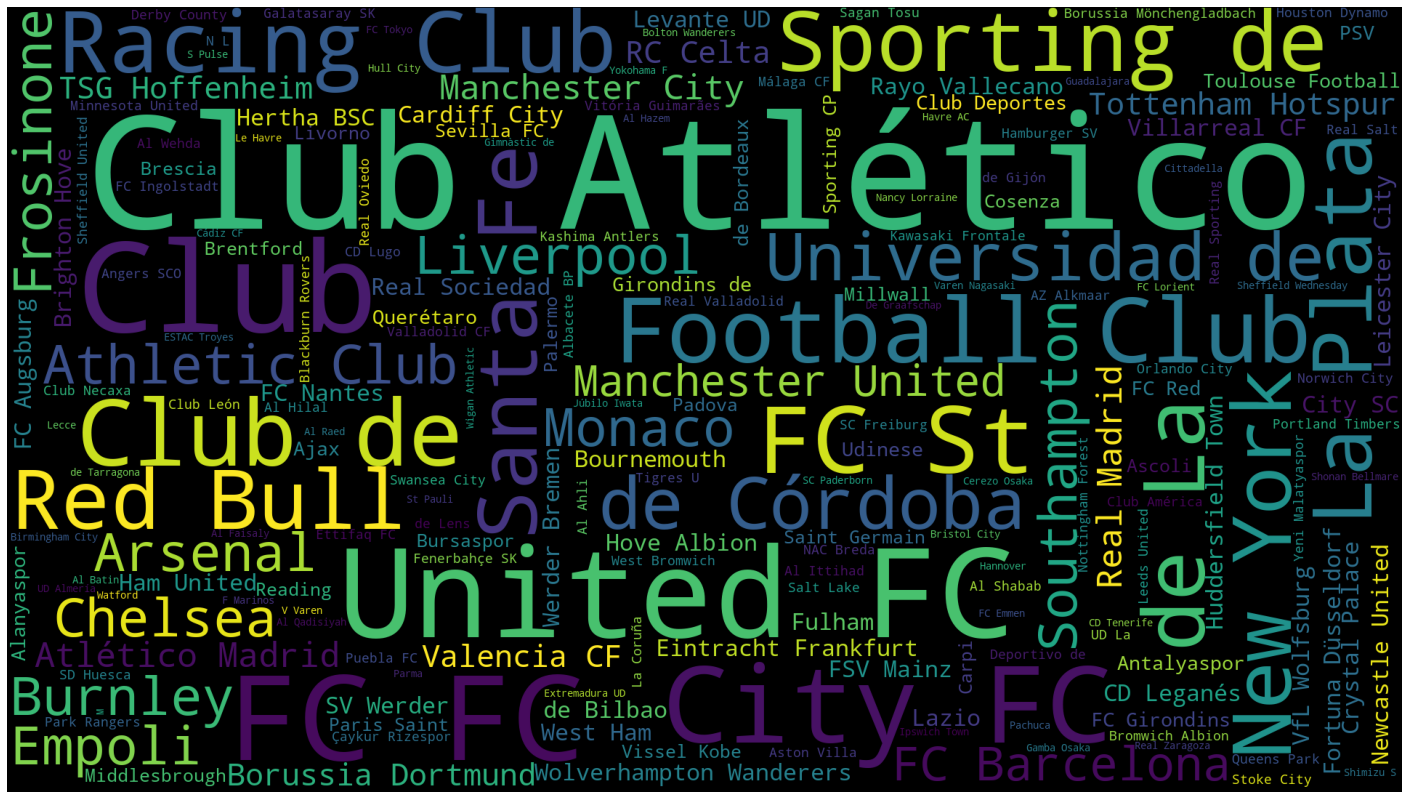

In [124]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()


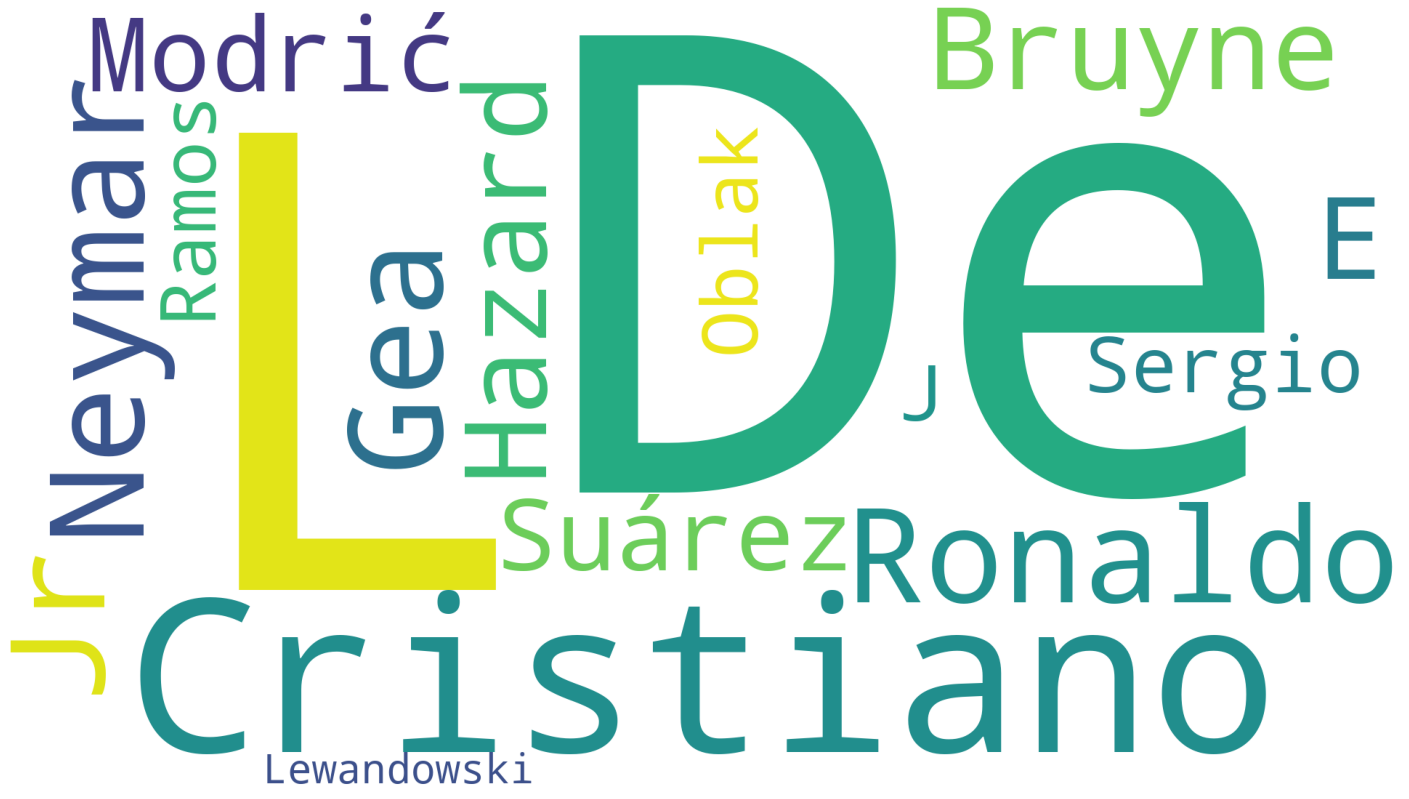

In [125]:
# showing the name of the players which occurs the most number of times(right join)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

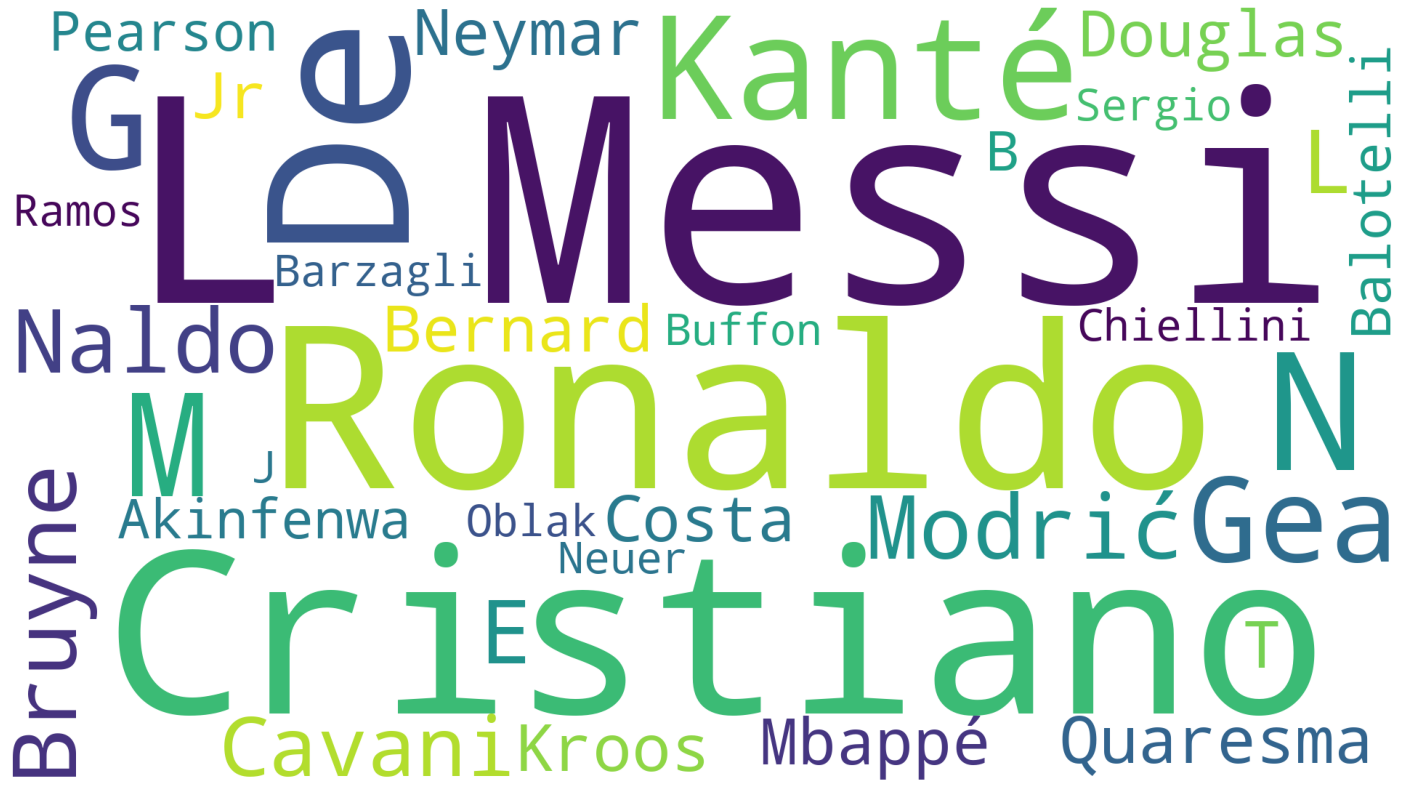

In [126]:
# Checking which player has been mentioned the most in the 'best' list that we have prepared
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(best))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()